In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

# Smart Grid Technology Analysis
Group Members: Scott Manning, Meghan Griffin, and Lily Caza

The Smart Grid Optimization project aims to show how using smart grid technologies leads to an overall reduction in energy needs for a residential community and associated energy costs. After demonstrating the benefits of a smart grid, the group gives one example of how a battery could be incorporated into a smart grid. 


## Project Outline
1. Introduction
2. Data Preparation
3. Scope: Size of Model Neighborhood on Smart Grid
4. First Optimization: Create Efficient Smart Grid
5. Energy Supply Prediction
6. Second Optimization: Minimizing Energy Supply
7. Break Down of Power Usage by Home in Neighborhood
8. Economic Analysis
9. Optimization Conclusions
10. Battery Capability Simulation
11. Battery Conclusions
12. References

## Introduction

**What is a smart grid?**

1.   The grid is a network of transmission lines, substations, and transformers that deliver electricity from power plants to homes and businesses.
2.  A smart grid connects buildings that produce electricity from renewable energy resources and consume/share grid energy.
3. Smart grids use digital technologies to communicate information between the customer and the utility.
4.   The sharing of local energy production requires efficient energy storage and discharge capabilities. 
5. A control scheme is necessary to coordinate efficient and equitable energy distribution so that the community is sustainable and residents have their energy requirements met.

*   [U.S. Department of Energy, 2021]
*   [Ramireddy, 2021]




**Why use a smart grid?**
1. Renewable energy and monitoring integrated into local communities to meet aggressive environmental goals such as:

*  New England’s net-zero emissions goal.
*  Paris Climate Agreement with the goal of limiting global warming to no more than 2 degrees greater than the pre-industrial levels.


2. Smart grids lead to reduced energy consumption, reduced energy costs, efficient and resilient energy transmission.

*  The U.S. Department of Energy’s Smart Grid System Report - Duke Energy has a continuous voltage reduction strategy that targets a voltage reduction of 2%.
*   Increases economic and environmental health.
*  Resilience allows the system to adapt to disturbances such as power outages.






*   [Tierney, 2020]
*   [United Nations Climate Change, 2021]
*   [Smart Grid System Report, 2018]





## Data Preparation
1. 
Data was retrieved from New England's public energy reports available on ISO New England's website. Four years worth of monthly energy data was used spanning from 2016 to 2019. 
2. In this first cell, data is loaded and processed into a pandas DataFrame from a Github repository. 
The data shows power usage in GigaWatt hours (GWh) for all of New England. The data is separated into individual months per year.



*    [ISO New England, 2016-2019]

,Year1,Year2,Year3,Year4,Average Monthly
Month,,,,,
1,10838,10563,11357,10903,10915.25
2,9957,9296,9235,9507,9498.75
3,9665,10266,9809,9744,9871.00
4,8887,8715,8844,8500,8736.50
5,9306,9052,8987,8608,8988.25
6,10013,10115,9607,9254,9747.25
7,12186,11223,12137,12200,11936.50
8,12444,10925,12420,11047,11709.00
9,10001,9679,9900,8960,9635.00


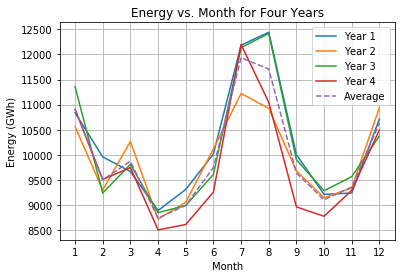

In [3]:
# Create dictionary containing initial data
Month_data = {'Month': [str(i+1) for i in range(12)]}
# Create dataframe
df = pd.DataFrame(Month_data, columns = ['Month'])

# Open list of files
for i in range(4):
    file = 'https://raw.githubusercontent.com/lcaza/Lily-Caza-Repository/main/monthly%20data_' + str(i) + '.csv'

    Name = pd.read_csv(file)
    
    df['Year' + str(i+1)] = Name['Energy']
    

df = df.set_index('Month')
df['Average Monthly'] = df.mean(axis=1)
display(df)

# df is the DataFrame for Total Power Needs for New England, 2016-2019

plt.plot(df["Year1"],label='Year 1')
plt.plot(df["Year2"],label='Year 2')
plt.plot(df["Year3"],label='Year 3')
plt.plot(df["Year4"],label='Year 4')
plt.plot(df["Average Monthly"],linestyle = 'dashed', label='Average')
plt.xlabel('Month')
plt.ylabel('Energy (GWh)')
plt.title('Energy vs. Month for Four Years')
plt.legend(loc='best')
plt.grid(True)

For data analysis, the average values calculated in each cell are used. As seen in the plot above, the highest average peaks over the course of four years occurred during months 7 to 8 (July to August) which correlates to an increase in energy due to air conditioning systems. Other, lower peaks occur in the winter months due to heating. Certain supplies must be guaranteed, such as heat and electricity, per consumer needs. However, smart grid technology can reduce energy requirements during peak months through the use of control signals that allow for the avoidance of unnecessary energy usage. 



*   [U.S. Department of Energy, 2021]



The average population in New England is approximately 14.85 million people. This information is used to convert the data into a monthly energy per capita basis, as shown in the cell below. The units are converted from GWh to MegaWatt hours (MWh) for a better display and scaling of the data.

In [4]:
# Calculate the average energy consumed per capita in the New England region which has a population of 14.85 people
people = 14.85e6 # Number of people in New England

# convert GWh to MWh
df['Year1 per capita'] = 1000*df['Year1']
df['Year2 per capita'] = 1000*df['Year2']
df['Year3 per capita'] = 1000*df['Year3']
df['Year4 per capita'] = 1000*df['Year4']
df['Average Monthly per capita'] = 1000*df['Average Monthly']

# divide by the number of people
df['Year1 per capita'] = (1/people)*df['Year1 per capita']
df['Year2 per capita'] = (1/people)*df['Year2 per capita']
df['Year3 per capita'] = (1/people)*df['Year3 per capita']
df['Year4 per capita'] = (1/people)*df['Year4 per capita']
df['Average Monthly per capita'] = (1/people)*df['Average Monthly per capita']


## Scope: Size of Model Neighborhood on Smart Grid
1. ‘Micro-neighborhood’ of five houses that share their power from a smart grid that controls their power consumption.
2. Set each house with a different number of residents to match an approximate average number of people of 2.5.
3. Through the scaling, the neighborhood has a total of 13 people.
4. Assumption that households are in a standard New England neighborhood to match the ISO New England data source.



*   [Bureau, 2020] 



The cell below prints a DataFrame that contains the total New England energy usage, the energy on a per capita basis, and the calculated total model neighborhood energy usage for each of the four years.  


,Average Monthly,Average Monthly per capita,Average Monthly Neighborhood
Month,,,
1,10915.25,0.735034,9.555438
2,9498.75,0.639646,8.315404
3,9871.00,0.664714,8.641279
4,8736.50,0.588316,7.648114
5,8988.25,0.605269,7.868502
6,9747.25,0.656380,8.532946
7,11936.50,0.803805,10.449461
8,11709.00,0.788485,10.250303
9,9635.00,0.648822,8.434680


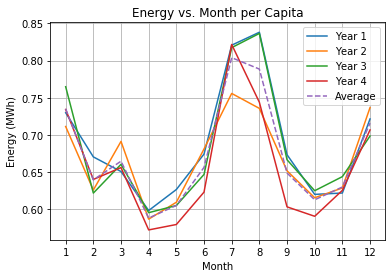

In [19]:
# Calculate for size of neighborhood
neighborhood = 13 # Number of people in neighborhood
df['Year1 Neighborhood'] = neighborhood*df['Year1 per capita']
df['Year2 Neighborhood'] = neighborhood*df['Year2 per capita']
df['Year3 Neighborhood'] = neighborhood*df['Year3 per capita']
df['Year4 Neighborhood'] = neighborhood*df['Year4 per capita']
df['Average Monthly Neighborhood'] = neighborhood*df['Average Monthly per capita']

display(df[['Average Monthly','Average Monthly per capita','Average Monthly Neighborhood']])

plt.plot(df["Year1 per capita"],label='Year 1')
plt.plot(df["Year2 per capita"],label='Year 2')
plt.plot(df["Year3 per capita"],label='Year 3')
plt.plot(df["Year4 per capita"],label='Year 4')
plt.plot(df["Average Monthly per capita"],linestyle = 'dashed', label='Average')
plt.xlabel('Month')
plt.ylabel('Energy (MWh)')
plt.title('Energy vs. Month per Capita')
plt.legend(loc='best')
plt.grid(True)

### First Optimization: Create Efficient Smart Grid
1. Duke energy has a projected goal of reducing voltage use by 2% using smart grid technology. 
2. The optimization problem below assumes this goal can be reached and therefore the average power usage is reduced by 2%. 
3. The optimization problem is solved using the CVXPY library.



*   [Smart Grid System Report, 2018] 



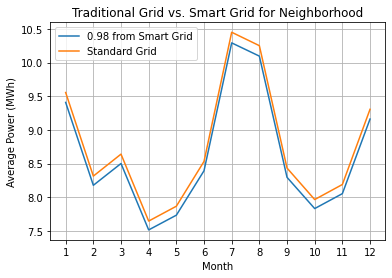

In [6]:
import cvxpy as cp

# Create an index by time with t_grid
t_grid = df.index

# Create decision variable
power = {t: cp.Variable(nonneg=True, name='power') for t in t_grid}

# Create objective function
objective = cp.Minimize(0)

# Constraints
Power_constraint = [power[t] >= 0.98*df['Average Monthly Neighborhood'][t] for t in t_grid]
Power_constraint1 = [power[t] <= df['Average Monthly Neighborhood'][t] for t in t_grid]

# Solve the problem
problem = cp.Problem(objective,  Power_constraint + Power_constraint1)
problem.solve()

# Display a meaningful solution using MatPlotlib
plt.plot(t_grid,[power[t].value for t in t_grid], label = '0.98 from Smart Grid')
plt.plot(df['Average Monthly Neighborhood'], label = 'Standard Grid')
plt.xlabel('Month')
plt.ylabel('Average Power (MWh)')
plt.title('Traditional Grid vs. Smart Grid for Neighborhood')
plt.grid(True)
plt.legend(loc='best')

Note that Pandas libraries are used throughout to create dictionaries/sub-dictionaries and DataFrames so that the data can be easily indexed and plotted.

Below, the results from the optimization to reduce energy are put into a dictionary and this dictionary is used to create a new DataFrame for the model neighborhood. This DataFrame contains the predicted energy usage on a monthly basis and a per capita basis using a smart grid.

In [7]:
# Smart_month is a DataFrame for 0.98 Total Power Needs for 13-person Neighborhood
smart_month = {'Monthly Average Neighborhood (MWh)': [power[t].value for t in t_grid]}
Month_data = {'Month': [str(i+1) for i in range(12)]}

# Smart is a new DataFrame for smart grid energy per capita.
smart = pd.DataFrame(Month_data, columns = ['Month'])
smart = smart.set_index('Month')
smart['Monthly Average Neighborhood (MWh)'] = [power[t].value for t in t_grid]
smart['Monthly Average per Capita (MWh)'] = 1/neighborhood*smart['Monthly Average Neighborhood (MWh)']
display(smart)

,Monthly Average Neighborhood (MWh),Monthly Average per Capita (MWh)
Month,,
1,9.408311,0.723716
2,8.178849,0.629142
3,8.502138,0.654011
4,7.516990,0.578230
5,7.735533,0.595041
6,8.394668,0.645744
7,10.291708,0.791670
8,10.095285,0.776560
9,8.297181,0.638245


## Energy Supply Prediction
1. To determine the total amount of power that needs to be supplied to the New England region, ISO uses yearly forecasts based on historical data.
2. Based on loss-of-load-expectation (LOLE), the forecasted power supply is always higher than the total amount of electric power that will be used. LOLE is a standard that ensures that an energy grid will have sufficient capacity to meet the load demands with only one predicted failure every 10 years.
3. The second optimization problem looks to reduce the LOLE based on the reduced energy consumption due to smart grid implementation. 
4. The data for the current energy demand predictions that meet the 1-in-10 year are accessed from ISO New England and are loaded into a pandas DataFrame from a Github repository in the cell below. 



*   [ISO New England, 2016-2019]



,Year1,Year2,Year3,Year4
Month,,,,
1,10986,12947,11483,11033
2,10095,11434,10282,9627
3,11690,11803,10214,10466
4,10134,10218,9030,9262
5,10413,10501,9592,9484
6,11652,11756,10522,10444
7,13290,13414,12844,12033
8,13076,13200,12196,11830
9,11003,11108,10385,9951


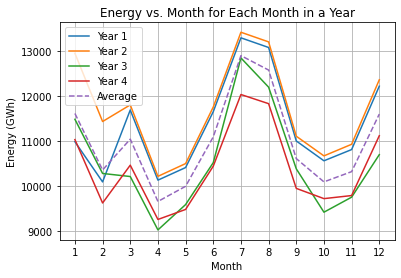

In [8]:
# Create dictionary containing initial data
Month_supply = {'Month': [str(i+1) for i in range(12)]}

# Create dataframe: supply is the LOLE DataFrame
supply = pd.DataFrame(Month_supply, columns = ['Month'])

# Open list of files
for j in range(4):
    supply_file = 'https://raw.githubusercontent.com/megriffs/controlsclass/main/CELT201' + str(j+6) + '.csv'

    Name_supply = pd.read_csv(supply_file)
    supply['Year' + str(j+1)] = Name_supply['Energy']
    
# Name_supply = Name_supply.set_index('Month')
supply = supply.set_index('Month')
display(supply)


supply['Average Monthly'] = supply.mean(axis=1)

plt.plot(supply["Year1"],label='Year 1')
plt.plot(supply["Year2"],label='Year 2')
plt.plot(supply["Year3"],label='Year 3')
plt.plot(supply["Year4"],label='Year 4')
plt.plot(supply["Average Monthly"],linestyle = 'dashed', label='Average')
plt.xlabel('Month')
plt.ylabel('Energy (GWh)')
plt.title('Energy vs. Month for Each Month in a Year')
plt.legend(loc='best')
plt.grid(True)

The average LOLE standard for the four years of data, printed in dashed lines, will be used as a general LOLE standard to be optimized. This simplification is justified because a smart grid that correctly accounts for the average LOLE will serve to provide reliable power to the neighborhood in most situations. 


The cell below creates a DataFrame that contains the New England energy supply prediction per capita in MWh. The DataFrame is converted to an average energy supply prediction. This is used as the upper bound in a new DataFrame. The upper bound is the theoretical maximum amount of energy that needs to be supplied to New England in order for energy usage and safety requirements to be met using traditional energy grids. This is used in the following optimization problem as an upper bound constraint. It will be shown that by using a smart grid, the average amount of energy that needs to be supplied can be reduced. 

In [9]:
# convert GWh to MWh
supply['Year1 per capita'] = 1000*supply['Year1']
supply['Year2 per capita'] = 1000*supply['Year2']
supply['Year3 per capita'] = 1000*supply['Year3']
supply['Year4 per capita'] = 1000*supply['Year4']
supply['Average Monthly per capita'] = 1000*supply['Average Monthly']

# divide by the number of people
supply['Year1 per capita'] = (1/people)*supply['Year1 per capita']
supply['Year2 per capita'] = (1/people)*supply['Year2 per capita']
supply['Year3 per capita'] = (1/people)*supply['Year3 per capita']
supply['Year4 per capita'] = (1/people)*supply['Year4 per capita']
supply['Average Monthly per capita'] = (1/people)*supply['Average Monthly per capita']

### DataFrame for upper bound values per capita
upper_bound = pd.DataFrame(supply['Average Monthly per capita'])
display(upper_bound)

,Average Monthly per capita
Month,
1,0.781970
2,0.697609
3,0.743653
4,0.650572
5,0.673232
6,0.747037
7,0.868367
8,0.846835
9,0.714596


## Second Optimization: Minimizing Energy Supply
1. The goal of the optimization is to create a new LOLE standard that requires less power to be supplied to the neighborhood than the traditional upper bound but still provides enough power to the neighborhood to exceed the setpoint.
2. The setpoint used is the 2% reduced average power usage using smart grid technology that was calculated in the first optimization problem. The cell below shows this monthly setpoint data in a new DataFrame.

In [10]:
# Setpoint is a DataFrame for reduced average power needs
setpoint = pd.DataFrame(smart[smart.columns[1]])
display(setpoint)

,Monthly Average per Capita (MWh)
Month,
1,0.723716
2,0.629142
3,0.654011
4,0.578230
5,0.595041
6,0.645744
7,0.791670
8,0.776560
9,0.638245


The power supply must exceed the average power usage in order to create a buffer between supply and usage in the event of a disturbance. This minimum threshold is determined by calculating the ratio between the average power usage in New England and the predicted power supply (both using a traditional grid). 
As a second constraint for the optimization problem, the power supply needed can only be minimized to this ratio above the energy usage using a smart grid. 

In [11]:
# Calculate the ratio of power supply to power needs without smart grid
Ratio = pd.DataFrame(upper_bound['Average Monthly per capita']/df['Average Monthly per capita'])
Avg_Ratio = Ratio.min(axis=0)
Ratio_val = Avg_Ratio['Average Monthly per capita']
print('The ratio between average power usage and predicted power supply in New England is:', round(Ratio_val, 3))

The ratio between average power usage and predicted power supply in New England is: 1.064


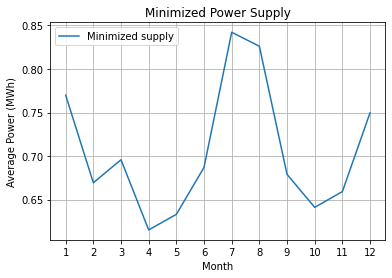

In [12]:
# Create an index by time with t_grid
t_grid = setpoint.index

# Optimization completed in a for loop over the time series data
for t in t_grid:
    # Create decision variable
    power = {t: cp.Variable(nonneg=True, name='power') for t in t_grid}

    # Create objective function
    objective = cp.Minimize(sum([(power[t]-setpoint['Monthly Average per Capita (MWh)'][t])**2 for t in t_grid]))

    # Constraints
    Power_constraint = [power[t] <= upper_bound['Average Monthly per capita'][t] for t in t_grid]
    Power_constraint_1 = [power[t] >= Ratio_val*setpoint['Monthly Average per Capita (MWh)'][t] for t in t_grid]

    # Solve the problem
    problem = cp.Problem(objective,  Power_constraint + Power_constraint_1)
    problem.solve()

# Display a meaningful solution using MatPlotlib
plt.plot(t_grid,[power[t].value for t in t_grid], label = 'Minimized supply')
plt.xlabel('Month')
plt.ylabel('Average Power (MWh)')
plt.title('Minimized Power Supply')
plt.grid(True)
plt.legend(loc='best')

The plot above shows a successful optimization that minimizes power supply to a ratio above the setpoint. The cell below displays a plot that compares average energy usage with a smart grid (setpoint) to the minimized power supply needed for this smart grid system. These are both compared with the traditional grid predicted power supply (upper bound). 

[0.7699295793148122, 0.6693164972738137, 0.6957728315974524, 0.6151532066540176, 0.6330377464112811, 0.6869780645380786, 0.842222431094381, 0.8261480926979075, 0.6790002263832955, 0.6410670169818979, 0.6591887324065099, 0.7497412245472097]


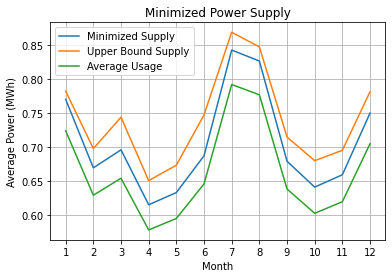

In [13]:
# Plot comparisons

plt.plot(t_grid,[power[t].value for t in t_grid], label = 'Minimized Supply')
plt.plot(t_grid,upper_bound, label='Upper Bound Supply')
plt.plot(t_grid,setpoint, label='Average Usage')

plt.xlabel('Month')
plt.ylabel('Average Power (MWh)')
plt.title('Minimized Power Supply')
plt.grid(True)
plt.legend(loc='best')

print([power[t].value for t in t_grid])

## Break Down of Power Usage by Home in Neighborhood


A dictionary is created to separate the five houses of the model neighborhood with the respective number of residents. This is, again, a neighborhood of 13 people that can be scaled to model analyses of larger neighborhoods.

In [14]:
house_data = {
    "H1": {"Residents": 3}, 
    "H2": {"Residents": 2}, 
    "H3": {"Residents": 4},
    "H4": {"Residents": 2},
    "H5": {"Residents": 2},
}

 A DataFrame for the minimized power supply for the specific neighborhood is created in the cell below. 

In [15]:
# Create dataframe for neighborhood values (multiply by number of people)

# Create dictionary containing initial data
Month = {'Month': [str(i+1) for i in range(12)]}

# Create dataframe
optimized_neighborhood = pd.DataFrame(Month, columns=['Month'])

# First column
optimized_neighborhood['Power per Capita (MWh)'] = [power[t].value for t in t_grid]
optimized_neighborhood['Total Power for the Neighborhood (MWh)'] = [13*power[t].value for t in t_grid]
optimized_neighborhood.reset_index()
optimized_neighborhood=optimized_neighborhood.set_index('Month')
display(optimized_neighborhood)


,Power per Capita (MWh),Total Power for the Neighborhood (MWh)
Month,,
1,0.769930,10.009085
2,0.669316,8.701114
3,0.695773,9.045047
4,0.615153,7.996992
5,0.633038,8.229491
6,0.686978,8.930715
7,0.842222,10.948892
8,0.826148,10.739925
9,0.679000,8.827003


 A simple third optimization is conducted to distribute the power supply per house based on the number of residents in each household. 
 A DataFrame is created to collect the information regarding respective energy supplies per house.

In [16]:
# Create an index by time with t_grid and create components from the data set
t_grid = optimized_neighborhood.index
components = set(house_data.keys())

# Create dictionary containing initial data
houses = {'House': [j+1 for j in range(5)]}

# Create new dataframe for modeled homes in smart grid
house_df = pd.DataFrame(houses, columns = ['House'])
house_df = house_df.set_index('House')
house_df['Number of Residents'] = [house_data[c]['Residents'] for c in components]

# Optimization completed in a for loop over the time series data
for t in t_grid:
    # Create components from data set
    components = set(house_data.keys())

    # Create decision variable
    house_power = {h: cp.Variable(nonneg=True, name='hpower') for h in components}
    
    # Create objective function
    objective = cp.Minimize(0)

    # Constraints
    Constraint1 = [optimized_neighborhood['Power per Capita (MWh)'][t] <= house_power[h]/house_data[h]['Residents'] for h in components] # Net power each month
    Constraint2 = [optimized_neighborhood['Total Power for the Neighborhood (MWh)'][t] >= sum(house_power[h] for h in components)] # Power per capita per household

    # Solve the problem
    problem = cp.Problem(objective,  Constraint1 + Constraint2)
    problem.solve()

    # Append Data to house_data dataframe
    house_df['Month'+str(t)] = [house_power[h].value for h in components]

# Create DataFrame to display house energy supply per month
month_house_df = house_df[house_df.columns[1:13]]
display(month_house_df)

,Month1,Month2,Month3,Month4,Month5,Month6,Month7,Month8,Month9,Month10,Month11,Month12
House,,,,,,,,,,,,
1,3.079718,2.677266,2.783091,2.460613,2.532151,2.747912,3.368890,3.304592,2.716001,2.564268,2.636755,2.998965
2,1.539859,1.338633,1.391546,1.230306,1.266075,1.373956,1.684445,1.652296,1.358000,1.282134,1.318377,1.499482
3,1.539859,1.338633,1.391546,1.230306,1.266075,1.373956,1.684445,1.652296,1.358000,1.282134,1.318377,1.499482
4,2.309789,2.007949,2.087318,1.845460,1.899113,2.060934,2.526667,2.478444,2.037001,1.923201,1.977566,2.249224
5,1.539859,1.338633,1.391546,1.230306,1.266075,1.373956,1.684445,1.652296,1.358000,1.282134,1.318377,1.499482


In the following cell, a DataFrame is created to take the transpose of the above 'month_house_df' DataFrame. This new DataFrame is plotted to show minimum power supply needed per house. 

,House1,House2,House3,House4,House5
Month,,,,,
1,3.079718,1.539859,1.539859,2.309789,1.539859
2,2.677266,1.338633,1.338633,2.007949,1.338633
3,2.783091,1.391546,1.391546,2.087318,1.391546
4,2.460613,1.230306,1.230306,1.845460,1.230306
5,2.532151,1.266075,1.266075,1.899113,1.266075
6,2.747912,1.373956,1.373956,2.060934,1.373956
7,3.368890,1.684445,1.684445,2.526667,1.684445
8,3.304592,1.652296,1.652296,2.478444,1.652296
9,2.716001,1.358000,1.358000,2.037001,1.358000


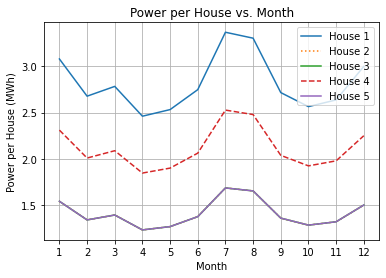

In [17]:
Month = {'Month': [str(i+1) for i in range(12)]}
# Create dataframe
month_df = pd.DataFrame(Month, columns=['Month'])

for j in range(5):

    month = list()
    month.clear()

    for i in range(12):
        month_val = (month_house_df['Month'+str(i+1)][j+1])
        month.append(month_val)
    
    month_df['House'+str(j+1)] = month

month_df = month_df.set_index('Month')
display(month_df)

plt.plot(t_grid, month_df['House1'], label='House 1', linestyle = '-')
plt.plot(t_grid, month_df['House2'], label='House 2', linestyle = ':')
plt.plot(t_grid, month_df['House3'], label='House 3')
plt.plot(t_grid, month_df['House4'], label='House 4', linestyle = '--')
plt.plot(t_grid, month_df['House5'], label='House 5')
plt.xlabel('Month')
plt.ylabel('Power per House (MWh)')
plt.title('Power per House vs. Month')
plt.grid(True)
plt.legend(loc='best')

The plot above shows that the houses power supply still follows the monthly trends based on seasonal energy expectations. Also, the supply is proportional to the minimum average energy usage. It can be seen that houses on a smart grid with fewer residents have a lower energy demand than houses with an increased number of residents. 

## Economic Analysis
With the minimized power supply, an economic analysis for the neighborhood is performed. Using average monthly power cost data from ISO New England that corresponds to a traditional grid, cost reductions can be shown after the implementation of a smart grid. In the cell below, the ISO data from 2016-2019 is loaded from a Github repository and then collected in a pandas DataFrame. The four year span matches the time frame used throughout the problem so that the analysis remains consistent.



*   [ISO New England, 2016-2019]


 

In [18]:
# Economic Analysis - Data Input

# Create dictionary containing initial data
Month_cost = {'Month': [str(i+1) for i in range(12)]}

# Create dataframe
cost = pd.DataFrame(Month_cost, columns = ['Month'])

# Open list of files
for j in range(4):
    cost_file = 'https://raw.githubusercontent.com/lcaza/Lily-Caza-Repository/main/LMP_' + str(j) + '.csv'

    Name_cost = pd.read_csv(cost_file)
    cost[f'Year {str(j)} Avg LMP'] = Name_cost['Real Time All Hours Avg LMP $/MWh']
    
# Set the cost index on a monthly basis    
cost = cost.set_index('Month')
cost['Mean LMP $/MWh'] = cost.mean(axis=1)

Locational Marginal Pricing (LMP) is the cost of energy for a specific region and ISO New England provides LMP data for the entire New England area.
For the economic analysis this standard LMP is used for all calculations. It is assumed the ISO LMP data accounts for traditional grid pricing. 
In the cell below, the average LMP cost per MWh is plotted. 

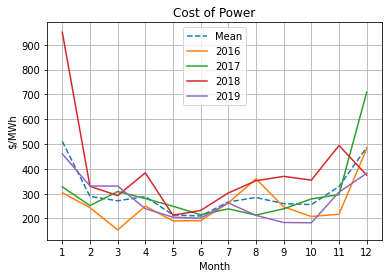

In [19]:
# Display data using MatPlotlib
plt.plot(cost['Mean LMP $/MWh'], linestyle = 'dashed', label='Mean')
plt.plot(cost['Year 0 Avg LMP'], label='2016')
plt.plot(cost['Year 1 Avg LMP'], label='2017')
plt.plot(cost['Year 2 Avg LMP'], label='2018')
plt.plot(cost['Year 3 Avg LMP'], label='2019')
plt.xlabel('Month')
plt.ylabel('$/MWh')
plt.title('Cost of Power')
plt.legend(loc='best')
plt.grid(True)

The graph above shows that energy costs are highest during the winter months. There are also lesser price peaks in the summer months. The cost of power data has an outlier in costs in 2018 in January due to a large winter storm. This storm is an example of a disturbance that could strain a traditional power grid. The smart grid can account for these disturbances and mitigate their impacts.

The smart grid should deliver cost savings because the energy usage is reduced in the first optimization problem above. The cost savings should be proportional to a 2% reduction in power usage. In the cell below, a new DataFrame is created that uses the mean cost from a traditional grid, calculates the reduced cost using a smart grid, and calculates the monthly cost savings from transitioning to a smart grid from a traditional grid. The costs are then displayed in a plot below.

,Mean LMP $/MWh,Smart Grid Cost $/MWh,Savings $/MWh
Month,,,
1,510.5025,500.29245,10.21005
2,289.0850,283.30330,5.78170
3,271.4575,266.02835,5.42915
4,288.3600,282.59280,5.76720
5,214.4700,210.18060,4.28940
6,210.0700,205.86860,4.20140
7,266.7750,261.43950,5.33550
8,284.5300,278.83940,5.69060
9,259.8875,254.68975,5.19775


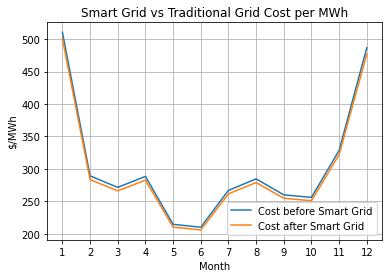

In [20]:
Cost_Reduction = pd.DataFrame(cost['Mean LMP $/MWh'])
Cost_Reduction['Smart Grid Cost $/MWh'] = 0.98*Cost_Reduction['Mean LMP $/MWh']
Cost_Reduction['Savings $/MWh'] = Cost_Reduction['Mean LMP $/MWh'] - Cost_Reduction['Smart Grid Cost $/MWh']
display(Cost_Reduction)

plt.plot(Cost_Reduction['Mean LMP $/MWh'], label='Cost before Smart Grid')
plt.plot(Cost_Reduction['Smart Grid Cost $/MWh'], label='Cost after Smart Grid')
plt.xlabel('Month')
plt.ylabel('$/MWh')
plt.title('Smart Grid vs Traditional Grid Cost per MWh')
plt.legend(loc='best')
plt.grid(True)

The savings shown above do not appear to be very large. However, these cost savings add up to a significant cost reduction for the residents.

With the cost savings determined above, the cost savings are analyzed for the model neighborhood of 13 residents. These cost savings for the model neighborhood are stored in two pandas DataFrames: the first DataFrame shows monthly savings per house, and the second DataFrame adds these monthly savings to show overall yearly savings for each house.

In [21]:
# Create an index by time with t_grid
t_grid = Cost_Reduction.index

# Create dataframe
Month = {'Month': [str(i+1) for i in range(12)]}
Total_Savings = pd.DataFrame(Month, columns = ['Month'])
House_Savings = pd.DataFrame({'Total Savings': [str(i) for i in range(1)]}, columns=['Total Savings'])

# Use a for loop to index through houses
for i in range(5):

    column = list()
    column.clear()

    Savings = 0
    # Use a for loop to index through time series
    for t in t_grid:
        val = month_df[f'House{i+1}'][t]*Cost_Reduction['Savings $/MWh'][t]
        column.append(val)

        # Sum up savings from each month for each house
        Savings = Savings + val
    
    # Assign calculated values to new dataframes
    Total_Savings[f'House{i+1}'] = column
    House_Savings[f'House{i+1}'] = Savings

# Set index 
Total_Savings = Total_Savings.set_index('Month')
display(Total_Savings)

# Create total savings for each house
House_Savings = House_Savings.set_index('Total Savings')
display(House_Savings)

,House1,House2,House3,House4,House5
Month,,,,,
1,31.444078,15.722039,15.722039,23.583059,15.722039
2,15.479149,7.739574,7.739574,11.609362,7.739574
3,15.109820,7.554910,7.554910,11.332365,7.554910
4,14.190846,7.095423,7.095423,10.643135,7.095423
5,10.861408,5.430704,5.430704,8.146056,5.430704
6,11.545079,5.772539,5.772539,8.658809,5.772539
7,17.974711,8.987356,8.987356,13.481033,8.987356
8,18.805113,9.402557,9.402557,14.103835,9.402557
9,14.117094,7.058547,7.058547,10.587820,7.058547


,House1,House2,House3,House4,House5
Total Savings,,,,,
0,209.153938,104.576969,104.576969,156.865453,104.576969


In the cell below, the 'Total_Savings' DataFrame is plotted to show monthly savings for each house.

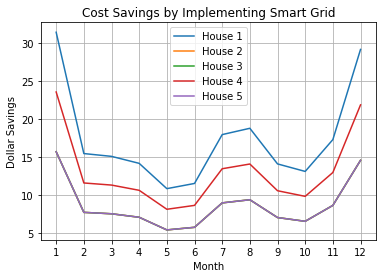

In [22]:
plt.plot(t_grid, Total_Savings['House1'], label='House 1')
plt.plot(t_grid, Total_Savings['House2'], label='House 2')
plt.plot(t_grid, Total_Savings['House3'], label='House 3')
plt.plot(t_grid, Total_Savings['House4'], label='House 4')
plt.plot(t_grid, Total_Savings['House5'], label='House 5')
plt.xlabel('Month')
plt.ylabel('Dollar Savings')
plt.title('Cost Savings by Implementing Smart Grid')
plt.legend(loc='best')
plt.grid(True)

Next, to show how the cost reduction leads to large savings, the total yearly savings for the model neighborhood is calculated. Then, to show how the savings increase for a larger scale, a neighborhood is modeled with 100 houses.

In [23]:
# find the total yearly savings for all five houses in the neighborhood
# scale up for a neighborhood of 100 houses, assuming they have the same average number of residents
five_house_savings = sum(House_Savings['House'+str(i+1)] for i in range(5))
print(f'Total Savings for 5 House Model Neighborhood = ${round(five_house_savings[0],2)}')

scale_up_savings = 20*five_house_savings
print(f'Total Savings for 100 House Neighborhood = ${round(scale_up_savings[0],2)}')

Total Savings for 5 House Model Neighborhood = $679.75
Total Savings for 100 House Neighborhood = $13595.01


## Optimization Conclusions

These results above demonstrate that cost savings add up to signficant cost reductions for residents living in larger neighborhoods. The optimizations and economic analyses demonstrate that smart grid implementation generates real power and cost savings. The goal of Duke Energy to reach a 2% reduction is a conservative goal, and this goal can be revised as smart grid technology improves and is more widely implemented.

## Battery Capability Simulation

As an addition to the Smart Grid Optimization project, a simple battery is modeled for one smart grid over the course of one day. A battery stores energy that can be discharged at controlled times. This functionality makes the battery an essential device in smart grids because it enables further power control. The batteries can collect power from the main grid or power plant and from renewable energy sources that are implemented in the smart neighborhood. The power can be stored and discharged at needed times, lending to more power system flexibility that can further reduce power needs and mitigate the impact of disturbances.



*   [Bowen, 2019]



As a first step, ISO New England is consulted for data usage in New England during one week in July. This week is taken to be representative of power needs throughout the summer for all of New England for each week. The data is loaded from a Github repository, collected in a pandas DataFrame, and plotted using MatPlotlib.



*   [ISO New England, 2016-2019]



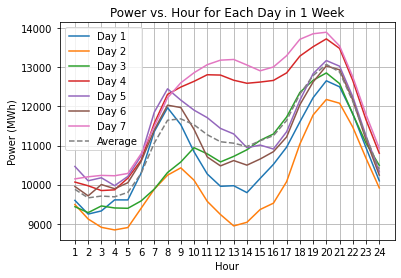

In [24]:
# Dataframe containing data for each day in 1 week

# Create dictionary containing initial data
Week_data = {'Hour Ending (HE)': [str(i+1) for i in range(24)]}
# Create dataframe
df = pd.DataFrame(Week_data, columns = ['Hour Ending (HE)'])

Dictionary_data = {}

# Open list of files
for i in range(7):
    file = 'https://raw.githubusercontent.com/lcaza/Lily-Caza-Repository/main/rt_hourlysysload_' + str(i) + '.csv'

    Name = 'Day' + str(i+1)
    Name = pd.read_csv(file)
    
    df['Day' + str(i+1)] = 'value'
    
    Repeat = False
    for j in range(len(df['Hour Ending (HE)'])):
        
        if not Repeat:
            if Name['Hour Ending (HE)'][j] == j+1:
                df['Day' + str(i+1)][j] = Name['Total Load (MWh)'][j]
            else: 
                df['Day' + str(i+1)][j] = (Name['Total Load (MWh)'][j-1] + Name['Total Load (MWh)'][j])/2
                Repeat = True

        if Repeat:
            if j == 23:
                continue
            df['Day' + str(i+1)][j+1] = Name['Total Load (MWh)'][j]

# Set index for DataFrame
df = df.set_index('Hour Ending (HE)')
df['Average Hourly'] = df.mean(axis=1)

# Plot data using MatPlotlib
plt.plot(df["Day1"],label='Day 1')
plt.plot(df["Day2"],label='Day 2')
plt.plot(df["Day3"],label='Day 3')
plt.plot(df["Day4"],label='Day 4')
plt.plot(df["Day5"],label='Day 5')
plt.plot(df["Day6"],label='Day 6')
plt.plot(df["Day7"],label='Day 7')
plt.plot(df["Average Hourly"],linestyle = 'dashed', label='Average')
plt.xlabel('Hour')
plt.ylabel('Power (MWh)')
plt.title('Power vs. Hour for Each Day in 1 Week')
plt.legend(loc='best')
plt.grid(True)

Using the average overall New England Data for one week as shown above, a new DataFrame is created in which the daily power requirements per capita are calculated for July. A dictionary is also created that contains the daily house energy needs, which are calculated from July of the original monthly energy usage per house DataFrame. The resulting DataFrame is plotted using MatPlotlib.

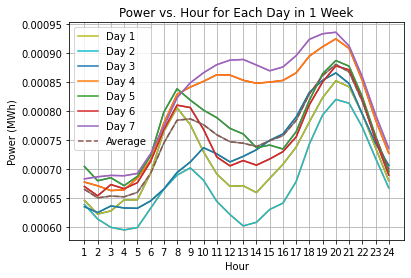

In [25]:
# Model the month of July by pulling values from monthly energy usage per house DataFrame
july_data = month_df.iloc[6,:]
# Calculate the daily energy needs for July
daily_data = july_data/31

# Create a dictionary of the five house smart meters
# Energy need is on a per day basis
# Energy production is the percentage of the houses' energy needs that they can supply for themselves (i.e. using a solar panel)
# The rest of the power comes from the smart-grid
# Assume that collectively the renewable energy sources the houses use accounts for 10% of each of the houses energy needs
house_data = {
    "H1": {"Residents": 3, "Energy Need": daily_data[0], "Energy Production": 0.1*daily_data[0]}, 
    "H2": {"Residents": 2, "Energy Need": daily_data[1], "Energy Production": 0.1*daily_data[1]}, 
    "H3": {"Residents": 4, "Energy Need": daily_data[2], "Energy Production": 0.1*daily_data[2]},
    "H4": {"Residents": 2, "Energy Need": daily_data[3], "Energy Production": 0.1*daily_data[3]},
    "H5": {"Residents": 2, "Energy Need": daily_data[4], "Energy Production":0.1*daily_data[4]},
}


# turn monthly house data into daily house data
_df = pd.DataFrame(df/people)

# Plot daily house DataFrame
plt.plot(_df)
plt.plot(_df["Day1"],label='Day 1')
plt.plot(_df["Day2"],label='Day 2')
plt.plot(_df["Day3"],label='Day 3')
plt.plot(_df["Day4"],label='Day 4')
plt.plot(_df["Day5"],label='Day 5')
plt.plot(_df["Day6"],label='Day 6')
plt.plot(_df["Day7"],label='Day 7')
plt.plot(_df["Average Hourly"],linestyle = 'dashed', label='Average')
plt.xlabel('Hour')
plt.ylabel('Power (MWh)')
plt.title('Power vs. Hour for Each Day in 1 Week')
plt.legend(loc='best')
plt.grid(True)

The plot above is used to generate a battery charge/discharge schedule for each day. According to the plot, energy usage is greatest between 6:00-10:00 A.M. and 5:00-10:00 P.M. The battery will discharge and provide energy to the neighborhood for these 8 hours every day. During the off-hours, the battery will charge from solar panels during peak sunlight hours (10:00 A.M. - 4:00 P.M.) and will charge from the power plant at night to fully charge the battery back to the initial amount needed at the start of the day. To simplify calculations, the battery is assumed to charge and discharge energy at a constant rate.

(0.0, 0.36)

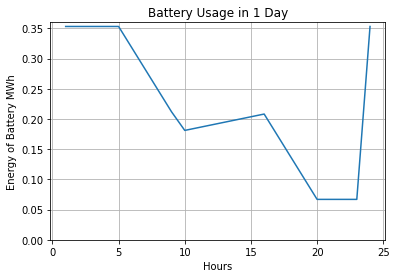

In [26]:
# Calculate the hourly amount of power needed by a house during peak use hours
Total_Power_Hour = 1/10*sum(house_data['H'+str(i+1)]['Energy Need'] for i in range(5))

# Create time series for each hour in a day
t_array = np.linspace(1,24,24)

# Function for when solar panel charges battery
def charge_time(t):
    if t >= 10 and t <= 16:
        amount_charged = 6*np.mean(_df["Average Hourly"])
    else:
        amount_charged = 0
    return amount_charged

# Function for battery discharges power to neighborhood
def discharge_time(t):
    if t >= 6 and t <= 10:
        amount_discharged = Total_Power_Hour
    elif t >= 17 and t < 21:
        amount_discharged = Total_Power_Hour
    else:
        amount_discharged = 0
    return amount_discharged

# Assume the smart-grid always holds a net-amount that could supply all five houses with energy for one day
net_amount = sum(daily_data)

# Record initial battery charge
initial_charge = net_amount

# Function that combines battery charge and discharge
def battery(t, net_amount):

    # Use two functions above for inputs
    amount_charged = charge_time(t)
    amount_discharged = discharge_time(t)

    # Update hourly
    new_net = net_amount + amount_charged - amount_discharged

    # Final charge from main grid at midnight
    if t == 24:
        new_net = initial_charge
    
    # Update net amount of energy in battery
    net_amount = new_net

    return net_amount

amount = list()
amount.clear()

# Create a for loop to run the battery
for i in t_array:
  val = battery(i,net_amount)
  amount.append(val)
  net_amount = val

# Plot results from function using MatPlotlib
plt.plot(t_array,amount)
plt.xlabel('Hours')
plt.ylabel('Energy of Battery MWh')
plt.title('Battery Usage in 1 Day')
plt.grid(True)
plt.ylim([0,0.360])

## Battery Conclusions

As seen in the plot above, the battery has one cycle in a July day. First, in the early hours of the day when no power supply is needed, the battery sits idle with no power supply lost. In the morning when residents begin to use utilities, the battery discharged energy. Then, in midday during peak sunlight, the battery regains some of its lost charge by pulling from the solar panels in the neighborhood. This charging from renewable sources allows for less total energy taken from the main power grid. Then, in the evening, the battery discharges power again to meet resident needs. Finally, at night fewer utilities are used, and the battery again sits idle and charges using power from the main grid. There are further opportunities to implement renewable energy sources in order to continually decrease the amount of non-renewable energy needed from the main power grid. 

## References


1.   U.S. Department of Energy. “The Smart Home.” SmartGrid.gov, 2021, https://www.smartgrid.gov/the_smart_grid/smart_home.html.
2.   Ramireddy, V. "An Overview of Smart Power Grid." 2021, https://electrical-engineering-portal.com/an-overview-of-smart-power-grid
3. Tierney, Sue, et al. Net-Zero New England: Ensuring Electric Reliability in a Low-Carbon Future, 
Energy and Environmental Economics and The Energy Future Initiatives, 2020. 
4. “The Paris Agreement.” Unfccc.int, The United Nations Climate Change, 2021, unfccc.int/process-and-meetings/the-paris-agreement the-paris-agreement. 
5. Smart Grid System Report, US Department of Energy, 2018, pp. 32–36. 
6. “Energy, Load, and Demand Reports.” ISO New England - Energy, Load, and Demand Reports, ISO 
New England, www.iso-ne.com/isoexpress/web/reports/load-and-demand. 
7. Bureau, US Census. “Historical Households Tables.” The United States Census Bureau, 23 Nov. 2020, 
www.census.gov/data/tables/time-series/demo/families/households.html
8. Bowen, Thomas, et al. “Grid-Scale Battery Storage Frequently Asked Questions.” Greening the Grid, National Renewable Energy Laboratory, 2019, https://www.nrel.gov/docs/fy19osti/74426.pdf.


